## Đồ án 1: Color Compression <a class="anchor" id="c2"></a>

### Nội dung đồ án <a class="anchor" id="c21"></a>

#### Giới thiệu

Một bức ảnh có thể lưu trữ dưới ma trận của các điểm ảnh. Có nhiều loại ảnh được sử dụng trong thực tế, ví dụ: ảnh xám, ảnh màu,... 

Đối với ảnh xám, một điểm ảnh sẽ là được biểu diễn bằng giá trị không âm. 

Ví dụ ta có thể dùng ma trận này:
$$\begin{bmatrix}
255 & 0 & 0  & 0  & 255 \\ 
255 & 0 & 255 & 0 & 255\\ 
255 & 0 & 255 & 0 & 255\\ 
255 & 0 & 255 & 0 & 255\\ 
255 & 0 & 0  & 0  & 255
\end{bmatrix}$$

có thể biểu diễn cho ảnh xám có nội dung như sau:

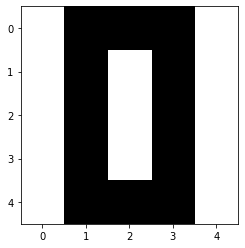

In [30]:
import matplotlib.pyplot as plt
plt.imshow(np.array([[255, 0, 0, 0, 255], [255, 0, 255, 0, 255], [255, 0, 255, 0, 255], [255, 0, 255, 0, 255], [255, 0, 0, 0, 255]]), cmap='gray', vmin=0, vmax=255);

Ảnh màu được sử dụng phổ biến là ảnh RGB, trong đó, mỗi điểm ảnh sẽ lưu trữ 3 thông tin kênh màu (mỗi kênh màu 1 byte) là: R (red - đỏ), G (green - xanh lá), B (blue - xanh dương). Ta có thể sử dụng ma trận:
```
                    [[[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]]]
```
để biểu diễn cho ảnh màu có nội dung sau:

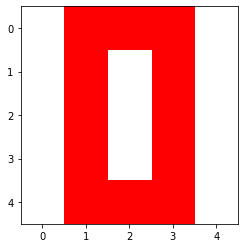

In [31]:
plt.imshow(np.array([[[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]]]));

Như vậy, số màu trong ảnh RGB có thể là $256^3 \approx 1.7 \times 10^7$. Với số lượng màu khá lớn, khi lưu trữ ảnh có thể sẽ tốn chi phí lưu trữ. Do đó bài toán đặt ra là giảm số lượng màu để biểu diễn ảnh sao cho nội dung ảnh được bảo toàn nhất có thể.

Trong ví dụ trên, số lượng màu cho ảnh ban đầu là 439 màu. Sau khi giảm số lượng màu xuống còn 5, ảnh không còn được chi tiết nhưng cơ bản vẫn bảo toàn nội dung của ảnh ban đầu.

Để thực hiện giảm số lượng màu, ta cần tìm ra các đại diện có thể thay thế cho một nhóm màu. Cụ thể trong trường hợp ảnh RGB, ta cần thực hiện gom nhóm các pixel ($\mathbb{R}^3$) và chọn ra đại diện cho từng nhóm. Như vậy, bài toán trên trở thành gom nhóm các vec-tơ.

#### Yêu cầu

Trong đồ án này, bạn được yêu cầu cài đặt thuật toán [K-Means](https://en.wikipedia.org/wiki/K-means_clustering) để giảm số lượng màu cho ảnh.

Các thư viện được phép sử dụng là: `NumPy` (tính toán ma trận), `PIL` (đọc, ghi ảnh), `matplotlib` (hiển thị ảnh).

Một số gợi ý:
- Đọc ảnh: `PIL.Image.open(...)`
- Hiển thị ảnh: `matplotlib.pyplot.imshow(...)`
- Thay đổi shape cho `np.ndarray`: `np.reshape(...)`
- Khai báo hàm gợi ý cho thuật toán K-Means:
```python
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm
    
    Inputs:
        img_1d : np.ndarray with shape=(height * width, num_channels)
            Original image in 1d array
        
        k_clusters : int
            Number of clusters
            
        max_iter : int
            Max iterator
            
        init_cluster : str
            The way which use to init centroids
            'random' --> centroid has `c` channels, with `c` is initial random in [0,255]
            'in_pixels' --> centroid is a random pixels of original image
            
    Outputs:
        centroids : np.ndarray with shape=(k_clusters, num_channels)
            Store color centroids
            
        labels : np.ndarray with shape=(height * width, )
            Store label for pixels (cluster's index on which the pixel belongs)
    
    '''
    
    ### YOUR CODE HERE
```

<font style="color:red">*Lưu ý: Không sử dụng K-Means đã được cài đặt sẵn trong các thư viện trong bài nộp. Bạn có thể sử dụng K-Means trong `scikit-learn` để kiểm tra.* </font>

### Quy định bài nộp <a class="anchor" id="c22"></a>

* Thực hiện toàn bộ bài làm trên 1 tập tin Jupyter Notebook (.ipynb) hoặc Python (.py)


* Bạn nộp tập tin `MSSV.zip` được nén từ thư mục MSSV chứa các tập tin sau:
    1. Báo cáo toàn bộ bài làm: `MSSV.pdf`
    2. Mã nguồn: `MSSV.ipynb` hoặc `MSSV.py`


* Trong đó, nội dung tập tin báo cáo gồm có:
    - Thông tin cá nhân: họ và tên, MSSV
    - Ý tưởng thực hiện, mô tả các hàm
    - Hình ảnh kết quả với từng số lượng màu, k = {3, 5, 7}
    - Nhận xét kết quả trên
    
    
* Ví dụ minh họa cây thư mục bài nộp sau khi giải nén tập tin `MSSV.zip` như sau:
```
MSSV
├── MSSV.pdf
└── MSSV.ipynb
```

### Quy định chấm bài <a class="anchor" id="c23"></a>

Những trường hợp sau đây sẽ bị 0 điểm toàn bộ đồ án:
* Nộp sai quy định
* Không có báo cáo
* Thực thi mã nguồn báo lỗi

<font style="color:red">**LƯU Ý: SAO CHÉP BÀI LÀM CỦA NHAU SẼ BỊ 0 ĐIỂM TOÀN BỘ PHẦN THỰC HÀNH**</font>